In [49]:
fileObject = open("ner.txt", "r")
data = fileObject.read()
print(data)

@paulwalk	O
It	O
's	O
the	O
view	O
from	O
where	O
I	O
'm	O
living	O
for	O
two	O
weeks	O
.	O
Empire	B-facility
State	I-facility
Building	I-facility
=	O
ESB	B-facility
.	O
Pretty	O
bad	O
storm	O
here	O
last	O
evening	O
.	O
	
From	O
Green	O
Newsfeed	O
:	O
AHFA	B-other
extends	O
deadline	O
for	O
Sage	B-other
Award	I-other
to	O
Nov	O
.	O
5	O
http://tinyurl.com/24agj38	O
	
Pxleyes	B-company
Top	O
50	O
Photography	O
Contest	O
Pictures	O
of	O
August	O
2010	O
...	O
http://bit.ly/bgCyZ0	O
#photography	O
	
today	O
is	O
my	O
last	O
day	O
at	O
the	O
office	O
.	O
	
4Dbling	B-person
's	O
place	O
til	O
monday	O
,	O
party	O
party	O
party	O
.	O
&lt;	O
3	O
	
watching	O
the	O
VMA	B-tvshow
pre-show	O
again	O
lol	O
it	O
was	O
n't	O
even	O
a	O
good	O
show	O
the	O
first	O
time	O
...	O
so	O
bored	O
!	O
	
27	O
followers	O
!	O
30	O
followers	O
is	O
my	O
goal	O
for	O
today	O
!	O
	
This	O
is	O
the	O
2nd	O
hospital	O
ive	O
been	O
in	O
today	O
,	O
but	O
ive	O
just	O
seen	O
a	O
doctor	O
who	O
was	O
an	O
older	O
versi

In [ ]:
# to seperate tweets we can use the blank line
# however can not seperate as sentence by sentence
# since some of the tweets have no punctuation and some of them use many puntuation '.'or '!' in one sentence
#like "Friday Night Eats" without punctuation 

In [63]:
import sys
from random import shuffle

proportionTrain = float(0.5)

#Read in the data
tweets = []
tokens = []

with open('ner.txt') as temp_file:

    
    for line in temp_file:
        if line.strip() == '':
            tweets.append(tokens)
            tokens = []
        else:
            (word, label) = line.strip().split('\t')
            tokens.append((word,label))

    shuffle(tweets)

    trainOut = open('train', 'w')
    devOut   = open('dev', 'w')

    for i in range(len(tweets)):
        out = None
        if i < int(proportionTrain * len(tweets)):
            out = trainOut
        else:
            out = devOut

        t = tweets[i]
        for w in t:
            out.write("%s\t%s\n" % w)
        out.write("\n")

In [64]:
print(tweets)

[[('Is', 'O'), ('all', 'O'), ('done', 'O'), ('getting', 'O'), ('things', 'O'), ('set', 'O'), ('up', 'O'), ('for', 'O'), ('the', 'O'), ('Ultimate', 'B-other'), ('Magic', 'I-other'), ('playtest', 'O'), ('that', 'O'), ('starts', 'O'), ('on', 'O'), ('Monday', 'O'), ('.', 'O'), ('Ca', 'O'), ("n't", 'O'), ('wait', 'O'), ('to', 'O'), ('see', 'O'), ('what', 'O'), ('people', 'O'), ('think', 'O'), ('.', 'O')], [('@paulwalk', 'O'), ('It', 'O'), ("'s", 'O'), ('the', 'O'), ('view', 'O'), ('from', 'O'), ('where', 'O'), ('I', 'O'), ("'m", 'O'), ('living', 'O'), ('for', 'O'), ('two', 'O'), ('weeks', 'O'), ('.', 'O'), ('Empire', 'B-facility'), ('State', 'I-facility'), ('Building', 'I-facility'), ('=', 'O'), ('ESB', 'B-facility'), ('.', 'O'), ('Pretty', 'O'), ('bad', 'O'), ('storm', 'O'), ('here', 'O'), ('last', 'O'), ('evening', 'O'), ('.', 'O')], [('sexy', 'O'), ('azz', 'O'), ('@RICCOBARRINO', 'O'), ('tweeted', 'O'), ('me', 'O'), ('but', 'O'), ('can', 'O'), ('i', 'O'), ('get', 'O'), ('a', 'O'), ('foll

In [65]:
len(tweets)  #how many tweets

2394

In [115]:
def averageLen(lst):
    lengths = [len(i) for i in lst]
    return 0 if len(lengths) == 0 else (float(sum(lengths)) / len(lengths))

averageLen(tweets)    #average length of tweets in the file

19.41060985797828

In [84]:
#tag lists
tags = []
for t in tweets:
    #print([x[1] for x in t])
    tags.extend([x[1] for x in t])
len(tags)

46469

In [85]:
#tag number that is not 'O'
n=0;
for t in tags:
    if t != 'O':
        n = n+1
        
print(n)

2462


In [86]:
tag_ratio = n/len(tags)
tag_ratio

0.05298155759753814

In [89]:
import numpy as np
np.unique(tags)

array(['B-company', 'B-facility', 'B-geo-loc', 'B-movie', 'B-musicartist',
       'B-other', 'B-person', 'B-product', 'B-sportsteam', 'B-tvshow',
       'I-company', 'I-facility', 'I-geo-loc', 'I-movie', 'I-musicartist',
       'I-other', 'I-person', 'I-product', 'I-sportsteam', 'I-tvshow',
       'O'], dtype='<U13')

In [91]:
len(np.unique(tags)) # 20 if not include 'o'

21

In [112]:
import pandas as pd
result = []
unique_tags = np.unique(tags)
for i in unique_tags:
    result.append([i,tags.count(i),tags.count(i)/len(tags)*100])

df = pd.DataFrame(result, columns =['TagName', 'Count','proportion%'])
df.sort_values(by=['proportion%'],ascending=False)

,TagName,Count,proportion%
20,O,44007,94.701844
6,B-person,449,0.966236
15,I-other,320,0.688631
2,B-geo-loc,276,0.593944
5,B-other,225,0.484194
16,I-person,215,0.462674
0,B-company,171,0.367987
11,I-facility,105,0.225957
1,B-facility,104,0.223805
7,B-product,97,0.208741


In [111]:
Noneo = []
for t in tags:
    if t != 'O':
        Noneo.append(t)

result = []
unique_tags = np.unique(Noneo)
for i in unique_tags:
    result.append([i,tags.count(i),tags.count(i)/len(Noneo)*100])

df = pd.DataFrame(result, columns =['TagName', 'Count','proportion%'])
df.sort_values(by=['proportion%'],ascending=False)

,TagName,Count,proportion%
6,B-person,449,18.237206
15,I-other,320,12.997563
2,B-geo-loc,276,11.210398
5,B-other,225,9.138911
16,I-person,215,8.732738
0,B-company,171,6.945573
11,I-facility,105,4.264825
1,B-facility,104,4.224208
7,B-product,97,3.939886
17,I-product,80,3.249391


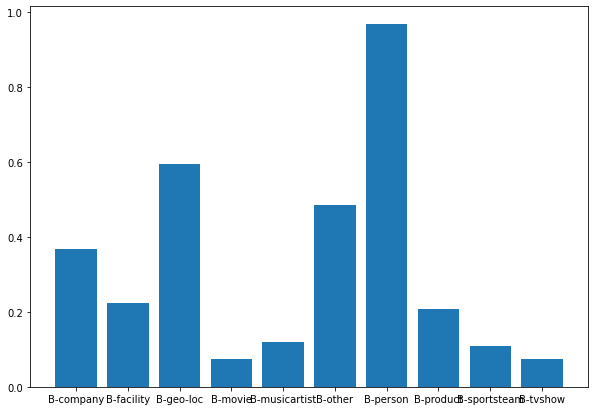

In [118]:
from matplotlib import pyplot as plt
 
# Read CSV into pandas

name = df['TagName']
prop = df['proportion%']
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(name[0:10], prop[0:10])
 
# Show Plot
plt.show()

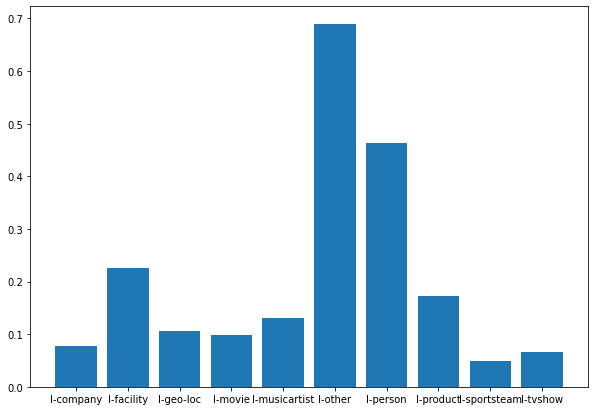

In [120]:
from matplotlib import pyplot as plt
 
# Read CSV into pandas

name = df['TagName']
prop = df['proportion%']
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(name[10:-1], prop[10:-1])
 
# Show Plot
plt.show()

                 count for B-     
-----------------------------------------
person            449             
geo-loc           276
facility          104
company           171
sportsteam        51
musicartist       55
product           97
tvshow            34
movie             34
other             225

In [ ]:
#d = {'TagName': ['person','company', 'geoloc','facility','product','musicartist','sportsteam','movie','tvshow','other'], 'col2':}
